# Закономерности, определяющие успешность игр

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение общей информации</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#name" data-toc-modified-id="name-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>name</a></span></li><li><span><a href="#year_of_release" data-toc-modified-id="year_of_release-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>year_of_release</a></span></li><li><span><a href="#user_score" data-toc-modified-id="user_score-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>user_score</a></span></li><li><span><a href="#critic_score" data-toc-modified-id="critic_score-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>critic_score</a></span></li><li><span><a href="#rating" data-toc-modified-id="rating-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>rating</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание проекта 

Интернет-магазин продаёт компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нам нужно выявить определяющие успешность игры закономерности — это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Цель — отработать принцип работы с данными. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import matplotlib.ticker as ticker

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Изучение общей информации

In [2]:
try:
    games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Год представлен типом float (ввиду наличия значений nan, имеющих тип float), и его следует заменить на int. Также User_Score имеет тип object, а значит, в столбце присутствуют строковые значения.

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод**

Мы посмотрели на таблицу с данными в нашем распоряжении. Выяснилось, что значения пропущены в 6 столбцах, при этом больше всего пропусков в Critic_Score — оценка игры, выставленная критиками. Также мы выявили, что некоторые столбцы имеют неправильный формат, который предпочтительнее заменить. Кроме того, данные в столбцах с количеством проданных копий имеют большой размах — напр. в NA кол-во варьруется от 0 до 40 млн, притом что медиана не превышает 0,08 млн. Это может говорить о наличии выбросов.

С точки зрения оформления датасета — названия всех столбцов представлены в разном регистре, что может быть неудобно в дальнейшем анализе.

## Подготовка данных

Для начала приведем названия всех столбцов к единообразию — нижнему регистру.

In [5]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Далее приступим к предобработке данных и обработаем пропуски, а также заменим типы некоторых столбцов на более подходящие. Начнем со столбца с названием игр — там всего 2 пропуска — и посмотрим, стоит ли с ними что-то делать.

### name

In [6]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что отсутствует как название игр, так и данные о жанре и рейтинге. Данные малоинформативны, можно удалить.

In [7]:
games = games.drop(games[games['name'].isnull()].index).reset_index(drop=True)
print('Удалено записей: {:.2%}'.format(1 - (games.shape[0] / 16715)))

Удалено записей: 0.01%


In [8]:
print('Длина датасета:', games.shape[0])
print('Кол-во названий', len(games['name'].unique()))

Длина датасета: 16713
Кол-во названий 11559


Мы видим, что уникальных значений среди названий игр меньше, чем всего строк в датасете, а значит, некоторые игры повторяются. Это может быть связано с тем, что игры могут выпускаться на нескольких платформах.

### year_of_release

Перейдем к столбцу с годом выпуска. Значений в нём пропущено относительно немного, но столбец имеет неудобный для этих данных формат float. Его лучше будет заменить на int, однако прежде всего попробуем заполнить пропуски по повторяющимся играм.

In [9]:
games['year_of_release'] = games.groupby('name')['year_of_release'].apply(lambda x: x.fillna(x.max()))
print('Осталось пропусков:', games['year_of_release'].isnull().sum())

Осталось пропусков: 146


Остальные пропуски можно заменить на -1, поскольку их не слишком много (менее 1%), восстановить их достоверно будет затруднительно, а заменить тип можно лишь если значений NaN не будет.

In [10]:
games['year_of_release'] = games['year_of_release'].fillna(-1).astype('int64')

### user_score

Мы видели, что у этого столбца тип object, хотя предполагается, что значения в нём содержатся численные. Стоит проверить уникальные значения в столбце, чтобы в этом убедиться.

In [11]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Действительно, помимо NaN мы видим аббревиатуру 'tbd'. Вероятнее всего оно означает 'to be done', что значит "заполнить" — на мой вгляд мало чем отличается от NaN. Можно посмотреть, сколько их всего.

In [12]:
print('Кол-во tbd:', len(games[games['user_score'] == 'tbd']))

Кол-во tbd: 2424


Достаточно большое количество. В целом по всему столбцу получается, что отсутствует примерно половина значений — 8 тысяч. Видимо при выгрузке оценок возникли проблемы. Заменим tbd на NaN, изменим тип столбца на float. Восстанавливать оценки не будем, чтобы не исказить дальнейший анализ — мы не можем с полной достоверностью восстановить оценки, поскольку на них может влиять огромное множество факторов.

In [13]:
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')

In [14]:
print('Пропусков в столбце с оценками пользователей:', games['user_score'].isna().sum())

Пропусков в столбце с оценками пользователей: 9123


### critic_score

По тому же принципу обработаем пропуски в столбце critic_score. Найдем лишь соответствия по имени, оставшиеся заменять не будем.

In [15]:
print('Пропусков в столбце с оценками критиков:', games['critic_score'].isna().sum())

Пропусков в столбце с оценками критиков: 8576


Осталось лишь привести столбец к типу int.

In [16]:
games['critic_score'] = pd.array(games.critic_score, dtype = 'Int64')

### rating

Столбец с рейтингом содержит строчные значения, но также в нём присутствуют пропуски. Они могут быть связаны как с тем, что рейтинг игре еще не был выставлен на момент сбора информации, так и с тем, что при его выгрузке произошла ошибка. Заменим пропущенные значения на undefined.

In [17]:
games['rating'] = games['rating'].fillna('undefined')

In [18]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


Последним шагом создадим в таблице столбец, в котором посчитаем количество продаж во всех регионах.

Создаем столбец и складываем все продажи.

In [19]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [20]:
games['total_sales'].describe()

count    16713.000000
mean         0.533315
std          1.548282
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

In [21]:
sales_var = np.var(games['total_sales'])
sales_std = np.sqrt(sales_var)
print('Дисперсия продаж:', sales_var)
print('Стандартное отклонение продаж:', sales_std)

Дисперсия продаж: 2.3970350003540153
Стандартное отклонение продаж: 1.5482360932215782


**Вывод**

На этом шаге мы работали с пропущенными значениями и типами данных в столбцах. Наибольшее количество пропусков было в столбцах с оценками пользователей и критиков. Их было решено оставить нетронутыми, поскольку они являются слишком специфичными.
Также был создан новый столбец с общим числом продаж каждой игры по всем регионам. Данные в этом столбце имеют большой разброс, причем 75% всех данных находятся в пределах 470 тыс., а максимальный показатель составляет 82 млн. Далее мы посмотрим на распределения более обстоятельно.

## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

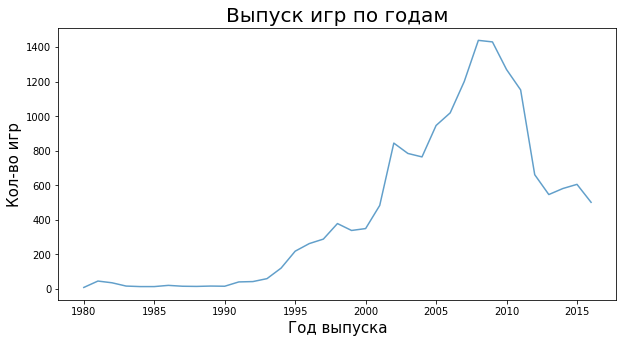

In [22]:
games_per_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count').loc[1980:2016,]

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(games_per_year, alpha=0.7)
ax.set_xlabel('Год выпуска', fontsize=15)
ax.set_ylabel('Кол-во игр', fontsize=15)
ax.set_title('Выпуск игр по годам', fontsize=20);

Видим, что количество выпускаемых игр росло с 1990 года и было на пике в 2008-2009 году. После 2010 это число стало опускаться с резким сокращением в 2011 г. В 2015 г. был короткий подъем с очередным спуском в 2016. Вероятно, спуск объясняется отсутствием части данных за 2016 год.

Далее посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами.

In [23]:
top_platforms = (games.groupby('platform')[['total_sales']].sum()
                .sort_values('total_sales', ascending=False).head(10))
    
top_platforms.style.bar()

,total_sales
platform,
PS2,1255.770000
X360,971.420000
PS3,939.650000
Wii,907.510000
DS,806.120000
PS,730.860000
GBA,317.850000
PS4,314.140000
PSP,294.050000


Видим, что лидерами продаж среди платформ являются PS2, Xbox, PS3. Десятку замыкает ПК. Построим распределение продаж по платформам и годам.

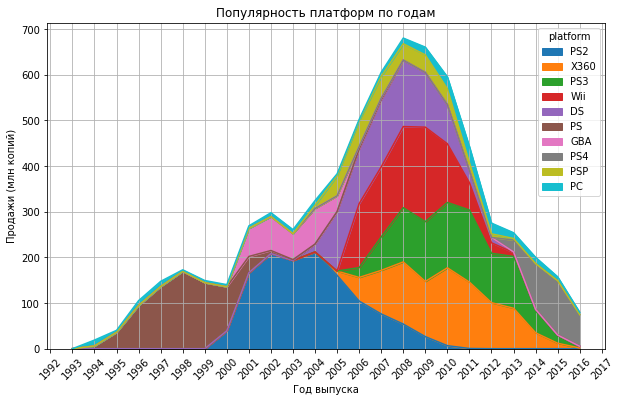

In [24]:
top_platform_per_year = games.pivot_table(index='year_of_release', columns='platform', 
                  values='total_sales', aggfunc='sum').loc[1993:2016, top_platforms.index]
ax = top_platform_per_year.plot(kind='area', figsize=(10,6), grid=True, rot=45)
ax.set_xlabel('Год выпуска')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylabel('Продажи (млн копий)')
ax.set_title('Популярность платформ по годам');

Судя по графику, новые платформы (в основном различные приставки) появляются примерно каждые пять лет и используются в пределах 10 лет. Исключение и самая долгоиграющая платформа — персональный компьютер. Циклы активных продаж PlayStation зависят от выхода новых версий. Период, в который появилось и использовалось самое большее число платформ — с 2005 по 2013. Также мы видим, что все лидеры к 2016 году завершили свой жизненный цикл, а держится только PS4 — по факту из-за того, что вышла недавно.

Актуальным периодом для нашего анализа можно считать годы с 2013 по 2016 — в это время сохраняется популярность определенных платформ. Посмотрим, какие платформы лидируют по продажам, растут и падают за этот период. Затем выберем несколько потенциально прибыльных платформ.

In [25]:
games_13_16 = games[games['year_of_release'] >= 2013]

top_platforms_13_16 = (games_13_16.groupby('platform')[['total_sales']].sum()
                .sort_values('total_sales', ascending=False).head(10))
top_platforms_13_16.style.bar()

,total_sales
platform,
PS4,314.140000
PS3,181.430000
XOne,159.320000
3DS,143.250000
X360,136.800000
WiiU,64.630000
PC,40.060000
PSV,32.990000
Wii,13.660000


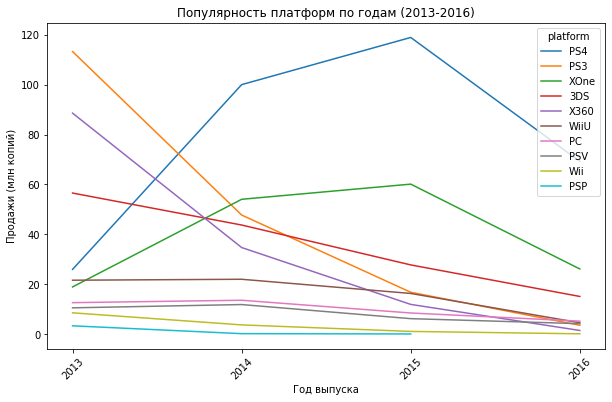

In [26]:
sales_per_platform = games_13_16.pivot_table(index='year_of_release', columns='platform', 
                                       values='total_sales', aggfunc='sum')[top_platforms_13_16.index]
ax = sales_per_platform.plot(figsize=(10,6), rot=45)
ax.set_xlabel('Год выпуска')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylabel('Продажи (млн копий)')
ax.set_title('Популярность платформ по годам (2013-2016)');

По графику мы видим, что в 2014-2015 резко выросли продажи для PS4, а также немного подросли для ПК и для XOne. Так как за 2016 год данные неполные, на графике мы видим падение продаж игр для этих платформ, однако это может не соответствовать действительности. Продажи для PS3, X360 и 3DS падают, но для 3DS падение не такое резкое, и, судя по всему, в 2017 продажи по ней еще будут сохраняться на уровне выше, чем для некоторых других платформ, которые падение продаж не демонстрируют. Примерно на одном уровне держатся продажи для PC и PSV, и они должны сохраняться и в 2017 году, поэтому можно считать их перспективными. Остальные платформы к рассматриваемому периоду уже потеряли актуальность. В дальнейшем будем работать со следующими платформами: 'PS4', 'PC', 'XOne', 'PSV', '3DS'.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

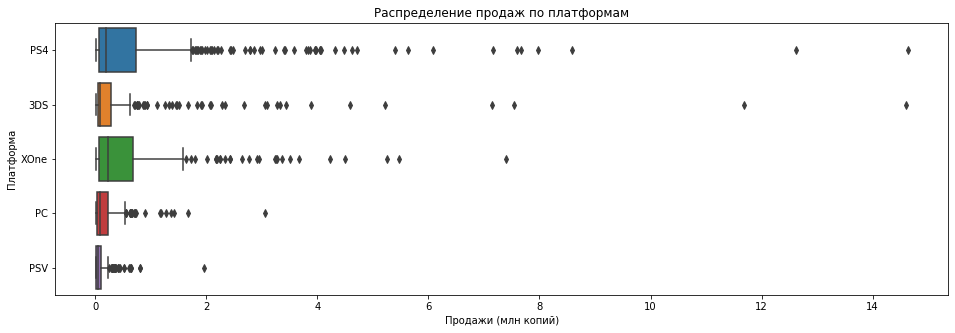

In [27]:
profitable_platforms = ['PS4', 'PC', 'XOne', 'PSV', '3DS']
fig, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(ax=ax, x="total_sales", y="platform", orient='h', 
            data=games_13_16[games_13_16['platform'].isin(profitable_platforms)])
ax.set_xlabel('Продажи (млн копий)')
ax.set_ylabel('Платформа')
ax.set_title('Распределение продаж по платформам');

Выбросов по каждой платформе достаточно много и значения доходят до 15 млн копий (у PS4 и 3DS). То есть на платформах есть такие игры, которые продаются в сотни раз больше, чем другие. Однако основное распределение для всех платформ PS4, XOne распологается примерно от ноля до 2 млн. копий, у остальных — от ноля до 1 млн. Наименьшай разброс данных у PSV, наибольший у PS4.

PS4, XOne, 3DS занимают существунную долю продаж на рынке с 2013 года.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для PS4.

In [28]:
games_PS4 = games_13_16[games_13_16['platform'] == 'PS4']

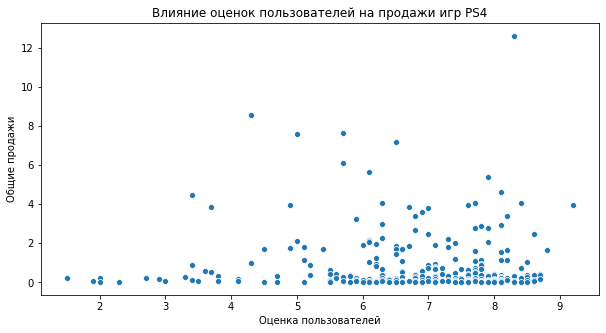

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='user_score', y='total_sales', data=games_PS4)
ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Общие продажи')
ax.set_title('Влияние оценок пользователей на продажи игр PS4');

In [30]:
games_PS4[['total_sales', 'user_score']].corr()

,total_sales,user_score
total_sales,1.000000,-0.031957
user_score,-0.031957,1.000000


Корреляция между оценками пользователей и продажами имеет очень маленький отрицательный коэффициент. То есть, нет прямой взаимосвязи между оценкой игры, выставленной игроками, и ее продажами — есть игры с низким рейтингом, но высокими продажами, а также с высоким рейтингом, но маленькими продажами. Однако, судя по графику, игроки в принципе не так часто ставят играм оценку ниже 5 и большее количество игр располагается на шкале от 5,5 до 9.

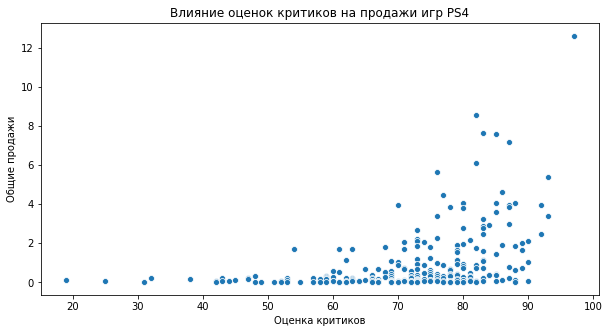

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='critic_score', y='total_sales', 
              data=games_PS4[games_PS4['critic_score'] > 0])
ax.set_xlabel('Оценка критиков')
ax.set_ylabel('Общие продажи')
ax.set_title('Влияние оценок критиков на продажи игр PS4');

In [32]:
games_PS4[['total_sales', 'critic_score']].corr()

,total_sales,critic_score
total_sales,1.000000,0.406568
critic_score,0.406568,1.000000


Корреляция между продажами и оценкой критиков слабая, но есть. График также подтверждает, что наиболее продаваемые игры имеют оценку критиков выше 70.

Теперь посмотрим, насколько отличается или не отличается картина на других платформах.

In [33]:
games_others_plats = games_13_16[games_13_16['platform'].isin(['PC', 'XOne', 'PSV', '3DS'])]

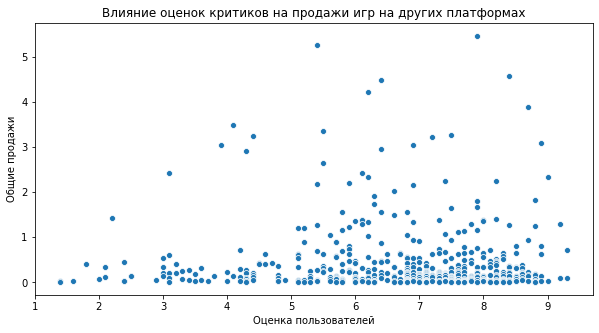

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='user_score', y='total_sales', 
              data=games_others_plats)
ax.set_xlabel('Оценка пользователей')
ax.set_ylabel('Общие продажи')
ax.set_title('Влияние оценок критиков на продажи игр на других платформах');

In [35]:
games_others_plats[['total_sales', 'user_score']].corr()

,total_sales,user_score
total_sales,1.000000,-0.026334
user_score,-0.026334,1.000000


Для других платформ мы видим даже чуть меньшую отрицательную корреляцию между оценками пользователей и числом продаж, и всё так же малозначимую. Играм всё еще чаще ставят оценку выше 5, но игры с высокими и низкими продажами есть как с одной, так и с другой стороны от этого балла.

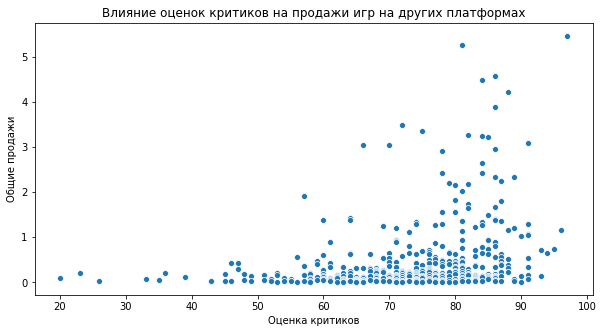

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='critic_score', y='total_sales', 
              data=games_others_plats[games_others_plats['critic_score'] > 0])
ax.set_xlabel('Оценка критиков')
ax.set_ylabel('Общие продажи')
ax.set_title('Влияние оценок критиков на продажи игр на других платформах');

In [37]:
games_others_plats[['total_sales', 'critic_score']].corr()

,total_sales,critic_score
total_sales,1.000000,0.298029
critic_score,0.298029,1.000000


Исходя из графиков, мы видим, что частная тенденция по PS4 сохраняется и для общего случая: корреляция продаж с критиками куда лучше, нежели с пользователями.

Посмотрим на общее распределение игр по жанрам и определим жанры с самыми высокими и самыми низкими продажами.

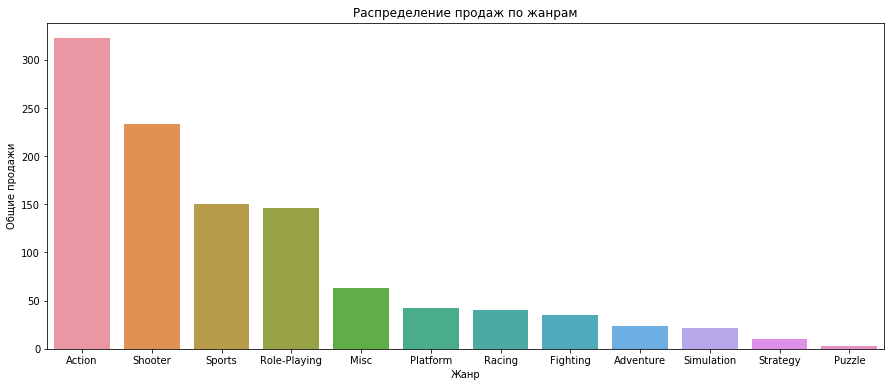

In [38]:
genres = (games_13_16.groupby('genre')[['total_sales']].sum()
                                  .sort_values('total_sales', ascending=False))
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=genres.index, y='total_sales', data=genres)
ax.set_xlabel('Жанр')
ax.set_ylabel('Общие продажи')
ax.set_title('Распределение продаж по жанрам');

Видим, что больше всего продаж в жанрах экшен, шутер и спорт. Меньшее число продаж у головоломок, стратегий и симуляторов. Посмотрим, какое в принципе количество игр выпускается в каждом из жанров, и какое среднее число копий игр продается в том или ином жанре. Выведем лидирующие пять жанров.

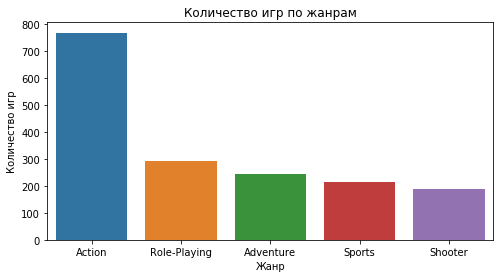

In [39]:
games_per_genres = (games_13_16.groupby('genre')[['name']].count()
                                      .sort_values('name', ascending=False).head())
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=games_per_genres.index, y='name', data=games_per_genres)
ax.set_xlabel('Жанр')
ax.set_ylabel('Количество игр')
ax.set_title('Количество игр по жанрам');

По количеству игр жанр Action, лидировавший в количестве продаж, заметно обгоняет другие жанры — значит, количество продаж может обуславливаться большим ассортиментом. Также можно заметить, что жанр Shooter, занимающий второе место по продажам, стоит лишь на 5-м месте по кол-ву выпускаемых игр. Можем предположить, что в этом жанре копии одной игры раскупаются большими тиражами.

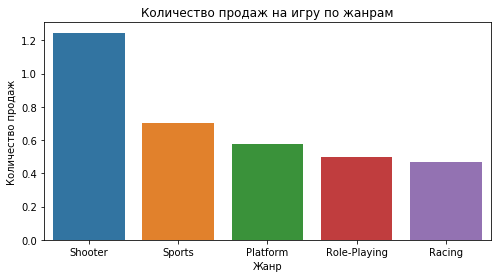

In [40]:
sales_per_game = (games_13_16.groupby(['genre'])[['total_sales']].mean()
                                      .sort_values('total_sales', ascending=False).head())
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=sales_per_game.index, y='total_sales', data=sales_per_game)
ax.set_xlabel('Жанр')
ax.set_ylabel('Количество продаж')
ax.set_title('Количество продаж на игру по жанрам');

Действительно, одни из наиболее покупаемых игр относятся к жанру Shooter. Средние продажи на игру в этом жанре превышают 400 тыс. копий. Жанр Action в этом топе не представлен вообще.

**Вывод**

Мы посмотрели на распределения продаж компьютерных игр в зависимости от плафтормы, оценок пользователей/критиков и жанра. Было определено, что наиболее интересными для нас платформами являются 'PS4', 'PC', 'XOne', 'PSV', '3DS'. Среди наиболее популярных жанров — Shooter, Sports и Role-Playing, а больше всего игр выпускается в жанре Action. Также мы определили, что между продажами и оценками критиков есть слабая корреляция, и что обычно игры с большими продажами имеют оценку выше 70.

## Портрет пользователя каждого региона

Для пользователя каждого региона (NA, EU, JP) определим:

- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)

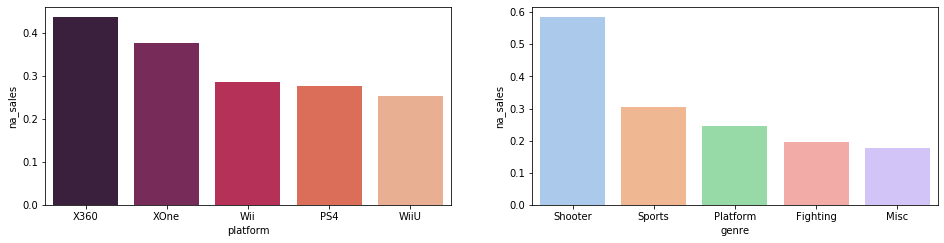

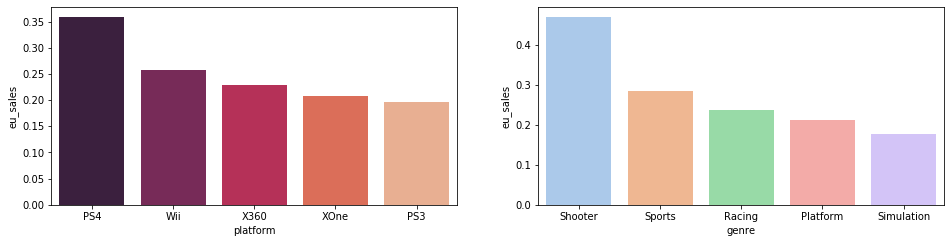

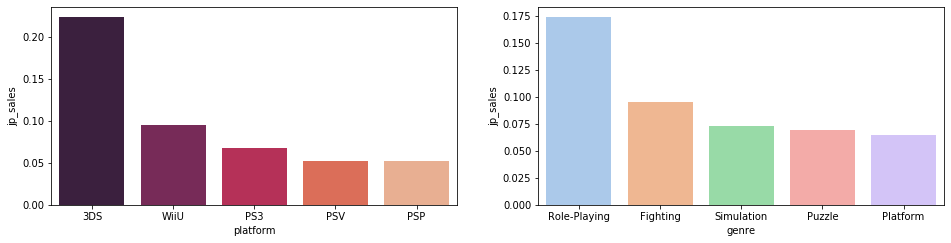

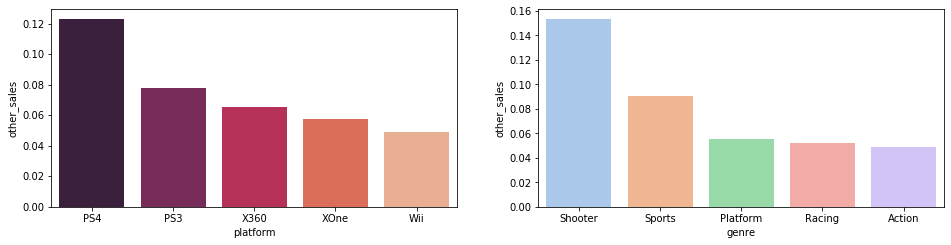

In [41]:
for column in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    top_platform = (games_13_16.groupby('platform')[[column]].mean()
                .sort_values(column, ascending=False).head())
    top_genre = (games_13_16.groupby('genre')[[column]].mean()
                .sort_values(column, ascending=False).head())
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.subplot(2, 2, 1)
    sns.barplot(x=top_platform.index, y=column, data=top_platform, palette='rocket')
    plt.subplot(2, 2, 2)
    sns.barplot(x=top_genre.index, y=column, data=top_genre, palette="pastel")
    ax.set_xlabel('Платформа')
    ax.set_ylabel('Продажи')
    ax.set_title(column);
    plt.show()

На графиках представлены средние продажи игр по платформам и жанрам.

**Платформы:**

Как видим из представленных графиков, преференции в регионах имеют различия. Особенно сильно отличается от остальных Япония. В то время, как на первых местах по продажам во всех регионах игры на стационарных консолях (PS4, X360), японцы предпочитают портативные (3DS, WiiU).

Самая большая популярность PS4 отмечается в Европе, а в Северной Америке лидирует Xbox 360. При этом регионы из раздела others имеют самые низкие доли продаж в сравнении с остальными регионами — продажи для самой популярной платформы не превышают в среднем 120 тыс. копий.

**Жанры:**

Самым излюбленным жанром всех регионов, кроме Японии является Shooter. В Японии полулярнее всего Role-Playing, а шутеры в топ не входят вообще. В целом в Японии продажи примерно в два раза ниже, чем в СА.

Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

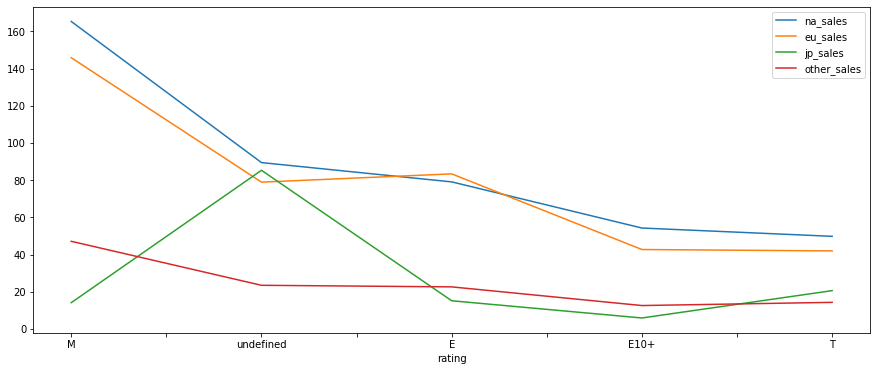

In [42]:
games_13_16.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales',
                        'other_sales']].sum().sort_values('na_sales', ascending=False).plot(figsize=(15,6));

Исходя из графика, можно предположить, что рейтинг игры по разному влияет на продажи в разных регионах. Например, для СА и Европы закономерность примерно одинковая — для рейтинга M ('Mature' — игры для взрослых) продажи выше, чем для других рейтингов. Самые низкие продажи в этих регионах для рейтинга E10+ ('Everyone 10+' — для всех старше 10 лет).

Япония снова отличилась от других регионов — самые популярные игры имеют рейтинг T ('Teen' — для подростков). Игры с рейтингом М и Е10+ имеют наименьшую популярность.

**Вывод**

В ходе определения наиболее популярных платформ и игр в каждом регионе было обнаружено, что все регионы, кроме Японии достаточно похожи в своих предпочтениях: самая популярная платформа у них PS4, а самый любимый жанр Action. В Японии же наиболее продаваемые игры идут на платформе 3DS и имеют жанр Role-Playing.

## Проверка гипотез

Рассмотрим средний рейтинг двух платформ — Xbox One и PC.

In [43]:
# уберем отсутствующие значения для удобства
xbox_games = games_13_16[games_13_16['platform'] == 'XOne'].dropna()
PC_games = games_13_16[games_13_16['platform'] == 'PC'].dropna()

In [44]:
print('Средний рейтинг Xbox One: {:.2f}, PC: {:.2f}'.format(xbox_games['user_score'].mean(), 
                                                                          PC_games['user_score'].mean()))

Средний рейтинг Xbox One: 6.54, PC: 6.31


Проверим, можно ли считать эти средние равными. Проверяемая гипотеза должна формулироваться таким образом, чтобы можно было использовать знак равенства, поэтому в нашем случае нулевая гипотеза будет выглядеть следующим образом: 

**«Средние пользовательские рейтинги платформ Xbox One и PC одинаковы»**, 

а альтернативная:

**«Средние пользовательские рейтинги платформ Xbox One и PC не одинаковы»**,

Для проверки нулевой гипотезы проведем t-test и будем использовать общепринятый критерий в 5%. Однако прежде всего проверим распределение данных и проверим, равны ли дисперсии наших выборок.

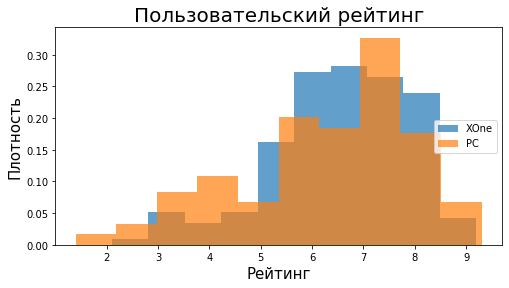

In [45]:
fig, ax = plt.subplots(figsize=(8,4))

#ax.hist(xbox_games['user_score'], label='X360', alpha=0.7, density=True)
ax.hist(xbox_games['user_score'], label='XOne', alpha=0.7, density=True)
ax.hist(PC_games['user_score'], label='PC', alpha=0.7, density=True)
ax.set_xlabel('Рейтинг', fontsize=15)
ax.set_ylabel('Плотность', fontsize=15)
ax.set_title('Пользовательский рейтинг', fontsize=20)
ax.legend(loc=5);

Распределение далеко от нормального, поэтому используем для проверки равенства дисперсий тест Левене. По его результатам определим значение equal_var для t-testa.

In [46]:
levene = st.levene(xbox_games['user_score'], 
                   PC_games['user_score'])
alpha = 0.05
print('p-значение для теста Левене:', levene.pvalue)
if levene.pvalue < alpha:
    print('Гипотеза о равенстве дисперсий не нашла подтверждения')
else:
    print('Отвергнуть гипотезу о равенстве дисперсий не удалось')

p-значение для теста Левене: 0.004755915168618154
Гипотеза о равенстве дисперсий не нашла подтверждения


In [47]:
equal_means = st.ttest_ind(
            xbox_games['user_score'],
            PC_games['user_score'],
            equal_var = False)

print('p-значение: ', equal_means.pvalue)
if equal_means.pvalue < alpha:
    print('Гипотеза о равенстве средних рейтингов не нашла подтверждения')
else:
    print('Отвергнуть гипотезу о равенстве средних рейтингов не удалось')

p-значение:  0.19483289586487235
Отвергнуть гипотезу о равенстве средних рейтингов не удалось


В ходе теста мы получили p-значение выше заданного порога, а значит, пользовательские оценки по платформам XOne и PC могут иметь различия, но получить такие различия с вероятностью 19% можно случайно. Это слишком высокая вероятность случайности, чтобы отвергать гипотезу Но, учитывая что мы поставили порог 5%. Таким образом делаем вывод, что оценки по выбранным платформам схожи, а если различия и имеются, то они статистически незначимы.

Далее посмотрим на средние пользовательские рейтинги жанров Action и Sports и проверим, есть ли между ними разница.

In [48]:
action_games = games_13_16[games_13_16['genre'] == 'Action'].dropna()
sports_games = games_13_16[games_13_16['genre'] == 'Sports'].dropna()

In [49]:
print('Средний рейтинг Action: {:.2f}, Sports {:.2f}'.format(action_games['user_score'].mean(), 
                                                                          sports_games['user_score'].mean()))

Средний рейтинг Action: 6.94, Sports 5.67


Проверим, можно ли считать эти средние равными. Нулевая гипотеза будет звучать следующим образом: 

**«Средние пользовательские рейтинги жанров Action и Sports одинаковы»**, 

а альтернативная:

**«Средние пользовательские рейтинги жанров Action и Sports не одинаковы»**,

Выполним проверку в соответствии с предыдущей.

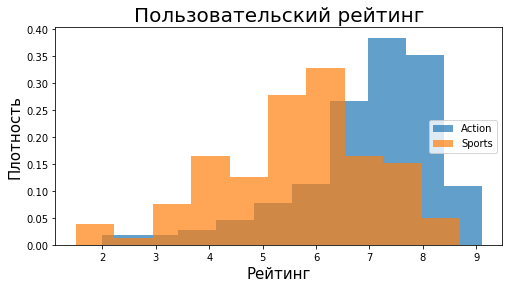

In [50]:
fig, ax = plt.subplots(figsize=(8,4))

ax.hist(action_games['user_score'], label='Action', alpha=0.7, density=True)
ax.hist(sports_games['user_score'], label='Sports', alpha=0.7, density=True)
ax.set_xlabel('Рейтинг', fontsize=15)
ax.set_ylabel('Плотность', fontsize=15)
ax.set_title('Пользовательский рейтинг', fontsize=20)
ax.legend(loc=5);

Распределение далеко от нормального, поэтому используем для проверки равенства дисперсий тест Левене. По его результатам определим значение equal_var для t-testa.

In [51]:
levene = st.levene(action_games['user_score'], 
                   sports_games['user_score'])
alpha = 0.05
print('p-значение для теста Левене:', levene.pvalue)
if levene.pvalue < alpha:
    print('Гипотеза о равенстве дисперсий не нашла подтверждения')
else:
    print('Отвергнуть гипотезу о равенстве дисперсий не удалось')

p-значение для теста Левене: 0.059795967970081416
Отвергнуть гипотезу о равенстве дисперсий не удалось


In [52]:
equal_means = st.ttest_ind(
            action_games['user_score'], 
            sports_games['user_score'],
            equal_var = True)

print('p-значение: ', equal_means.pvalue)
if equal_means.pvalue < alpha:
    print('Гипотеза о равенстве средних рейтингах не нашла подтверждения')
else:
    print('Отвергнуть гипотезу о равенстве средних ретингов не удалось')

p-значение:  1.5265482867026006e-16
Гипотеза о равенстве средних рейтингах не нашла подтверждения


В ходе теста мы получили очень малое p-значение, что дает нам основание отвергнуть гипотезу Но о равенств. Делаем вывод, что средние пользовательские рейтинги по жанрам Action и Sport имеют статистически значимые различия.

**Вывод**

Мы провели проверку двух нулевых гипотез. Первая гласила, что средний рейтинг игр на плафтормах XOne и ПК равны, и она не была отвергнута. Вторая аналогичная гипотеза о среднем рейтинге игр жанра Action и Sports не получила своего подтверждения.

## Общий вывод

Было проведено исследование данных о продажах компьютерных игр. В набор входили данные о платформах, на которых вышли эти игры, годе их выпуска, жанре, рейтинге и продажах в разных регионах. В наборе были обнаружены пропущенные значения: в столбцах с годом выпуска, рейтингом и оценками пропуски не были заполнены, чтобы не искажать результаты анализа. Для каждой игры были рассчитаны общие продажи по всем регионам.

В целом было выявлено, что новые платформы имеют тенденцию появляться каждые 5 лет и использоваться в пределах 10 лет. Имея это в виду, был выделен актуальный период, на основании которого можно было делать выводы для интересующего нас 2017 года. В этот период (с 2013 по 2016 г.) самыми популярными платформами были PlayStation 4, ПК, Xbox One и 3DS. Причем было замечено, что распределение популярности этих платформ в разных регионах отличалось. Так, например, в Японии популярнее всего была платформа 3DS, в то время как для других регионов это была платформа PS4. Если говорить о жанрах, то наиболее популярными оказались Shooter, Sports и Role-Playing, а больше всего игр выпускалось в жанре Action. Опять же, для Японии наиболее популярен был жанр Role-Playing, в то время как для остальных регионов — Shooter. В плане возрастного рейтинга в Японии наиболее популярны игры для подростков, а в остальных регионах — для взрослых. Помимо этого в ходе исследования было выявлено, что оценки критиков коррелируют с количеством продаж больше, чем оценки пользователей, при этом наиболее продаваемые игры обычно имеют рейтинг не 70 баллов. Однако, игры жанра Sports в среднем имеют рейтинг ниже 6, но являются вторыми по популярности.

Исходя из проведенного исследования, можно примерно очертить, на что делать акцент при планировании рекламных компаний. Так как компания осуществляет продажи по всему миру, ей необходимо ориентироваться не только на общие по всему миру показатели, но и отдельно учитывать специфику каждого региона. Соответственно, наибольшие продажи в СА и Европе соберут игры на консолях (PS4, Xbox) в жанре Shooter и рейтингом «для взрослых», а, например, в Японии наиболее популярными будут игры на портативных устройствах (3DS, PSV) в жанре Role-playing и с рейтингом «для подростков».